In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
RESULT_PATH = '../logs/log_threshold_linear.json'

In [3]:
with open(RESULT_PATH, 'r') as f:
    results = json.load(f)
results

[{'entry_results': [{'faulted_coeffs': 265,
    'total_equations': 35072,
    'filtered_equations': 276,
    'timeout_limit': 60,
    'duration': 0.459270715713501,
    'failure': False,
    'equations_used': 265.0},
   {'faulted_coeffs': 273,
    'total_equations': 35072,
    'filtered_equations': 291,
    'timeout_limit': 60,
    'duration': 0.7714691162109375,
    'failure': False,
    'equations_used': 273.0},
   {'faulted_coeffs': 289,
    'total_equations': 35072,
    'filtered_equations': 299,
    'timeout_limit': 60,
    'duration': 0.8925719261169434,
    'failure': False,
    'equations_used': 289.0},
   {'faulted_coeffs': 256,
    'total_equations': 35072,
    'filtered_equations': 274,
    'timeout_limit': 60,
    'duration': 16.262606859207153,
    'failure': False,
    'equations_used': 256.0},
   {'faulted_coeffs': 287,
    'total_equations': 35072,
    'filtered_equations': 298,
    'timeout_limit': 60,
    'duration': 0.3666548728942871,
    'failure': False,
    'equa

In [4]:
meta = [key for key in results[0].keys() if key != 'entry_results']
meta

['m', 'num_signatures', 'nist_param_level', 'threshold']

In [5]:
df = pd.json_normalize(data=results, record_path='entry_results', meta=meta)
df = df[df['threshold'] > 0] # script had bugs at this point so data is invalid
df = df.assign(false_positive_rate=lambda x: (x.filtered_equations - x.faulted_coeffs) / x.filtered_equations)
df

,faulted_coeffs,total_equations,filtered_equations,timeout_limit,duration,failure,equations_used,failure_reason,m,num_signatures,nist_param_level,threshold,false_positive_rate
0,265,35072,276,60.0,0.459271,False,265.0,NaN,1270,137,3,196,0.039855
1,273,35072,291,60.0,0.771469,False,273.0,NaN,1270,137,3,196,0.061856
2,289,35072,299,60.0,0.892572,False,289.0,NaN,1270,137,3,196,0.033445
3,256,35072,274,60.0,16.262607,False,256.0,NaN,1270,137,3,196,0.065693
4,287,35072,298,60.0,0.366655,False,287.0,NaN,1270,137,3,196,0.036913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,304,5774592,321,60.0,60.000000,True,NaN,TIMEOUT,1279,22557,3,1,0.052960
2131,278,5774592,296,NaN,NaN,True,NaN,NO_ATTACK,1279,22557,3,1,0.060811
2132,256,5774592,272,NaN,NaN,True,NaN,NO_ATTACK,1279,22557,3,1,0.058824
2133,309,5774592,320,NaN,NaN,True,NaN,NO_ATTACK,1279,22557,3,1,0.034375


In [6]:
df_1278_and_success = df[(df['m'] == 1278) & (df['failure'] == False)][['false_positive_rate', 'duration']]
df_1278_and_success

,false_positive_rate,duration
170,0.194118,24.014133
175,0.185792,21.805979
180,0.206215,26.624871
195,0.147399,0.412125
196,0.157895,15.326650
...,...,...
1920,0.039216,0.483382
1921,0.015385,0.350437
1922,0.019737,0.330561
1923,0.028369,0.365277


In [7]:
minimum, maximum, difference = (
df_1278_and_success['false_positive_rate'].min(),
df_1278_and_success['false_positive_rate'].max(),
df_1278_and_success['false_positive_rate'].max() - df_1278_and_success['false_positive_rate'].min()
)
minimum, maximum, difference

(0.014336917562724014, 0.2113095238095238, 0.1969726062467998)

In [8]:
minimum, maximum = np.floor(minimum * 100) / 100, np.ceil(maximum * 100) / 100
difference = maximum - minimum
minimum, maximum, difference

(0.01, 0.22, 0.21)

In [9]:
bins = np.arange(minimum, maximum + 0.01, 0.01)
bins

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22])

Text(0, 0.5, 'avg. duration (s)')

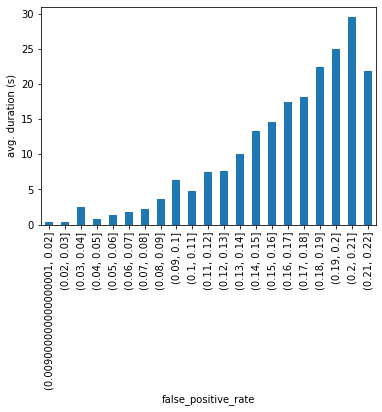

In [10]:
df_1278_and_success.groupby(
    pd.cut(x=df_1278_and_success['false_positive_rate'],
           bins=bins,
           include_lowest=True
    )
).mean()['duration'].plot(kind='bar', legend=False).set_ylabel("avg. duration (s)")

In [11]:
df_1278_and_success['false_positive_rate'].corr(df_1278_and_success['duration'])

0.7396120865710296